In [1]:
# Cell 1: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Setup complete!")

Matplotlib is building the font cache; this may take a moment.


✅ Setup complete!


In [3]:
# Cell 2: Load Data
train_df = pd.read_csv('../data/raw/task_dataset-training_dataset.csv')
val_df = pd.read_csv('../data/raw/task_dataset-validation_dataset.csv')

print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"\nColumns: {train_df.columns.tolist()}")

Training samples: 8936
Validation samples: 2681

Columns: ['property_address', 'categories']


In [4]:
# Cell 3: Basic Info
print("=== DATASET INFO ===")
print(train_df.info())
print("\n=== MISSING VALUES ===")
print(train_df.isnull().sum())
print("\n=== FIRST FEW SAMPLES ===")
train_df.head(10)

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   property_address  8936 non-null   object
 1   categories        8936 non-null   object
dtypes: object(2)
memory usage: 139.8+ KB
None

=== MISSING VALUES ===
property_address    0
categories          0
dtype: int64

=== FIRST FEW SAMPLES ===


,property_address,categories
0,"New Ppid 1Kqttmg7, House, Property Id No.58C57U54 Having Land Measuring 200 Sq.Yd Situated At Vaka Jasico Colony, Jagadhri, And Distt. Yamunanagar Inside Mc Limits, Tehsil Jagadhri Near Mandir",houseorplot
1,"Property Of Rs No.12/2,Plot No. 01,House Number.7/48 & 5/13, E-Swatthu \n No:151500500900500801, Situated At Kotnoor(D) Village, Kalaburagi \n Taluk, Dist.Kalaburagi . 585102.",houseorplot
2,"Flat-504,Floor-5 Shanti Vista-Ii Wing C Bldg 9 S No 52 & 54,Wing C,Offvillage Khaira ,Yashwantshrusthi Boisar-Palghar Road,Boisar West Palghar 401501 Maharashtra",flat
3,"Flat-103,Floor-1 Eshamya Florenza Tower L S No Rs 364,B/S Gayatri Petrolpump,Off Gorwa Refinery Roadundera Vadodara 390016 Gujarat",flat
4,Flat No G 532 I P Extension Patparganj 2Nd Floor Agarsen Awas Nr. Balco Market,flat
5,"R.S. No. 7251/4, Mandal Patia, Opposite Post Office, Bengaluru North, Karnataka - 670307",landparcel
6,"Unit No. 81-D11-B-1F In Project Signatureglobal City 81 Sector-81, Village-Nakhdola, Gurugram",flat
7,"Unit-613 Huda S No / Sector 25,Urban Estate Panchkula 134109 Haryana",flat
8,"Unit No 10C Tower-B3, Sector-565 Spaze I Tech Park Tower B3 Sector 885 Omaxe City Centre",flat
9,Flat No 1 Ground Floor Building A Sarita Garden Chsl 000 Sarita Garden Chsl Pune,flat


=== CATEGORY DISTRIBUTION ===
categories
flat               3232
houseorplot        2673
others             1197
commercial unit     965
landparcel          869
Name: count, dtype: int64

Percentage distribution:
categories
flat               36.17
houseorplot        29.91
others             13.40
commercial unit    10.80
landparcel          9.72
Name: count, dtype: float64


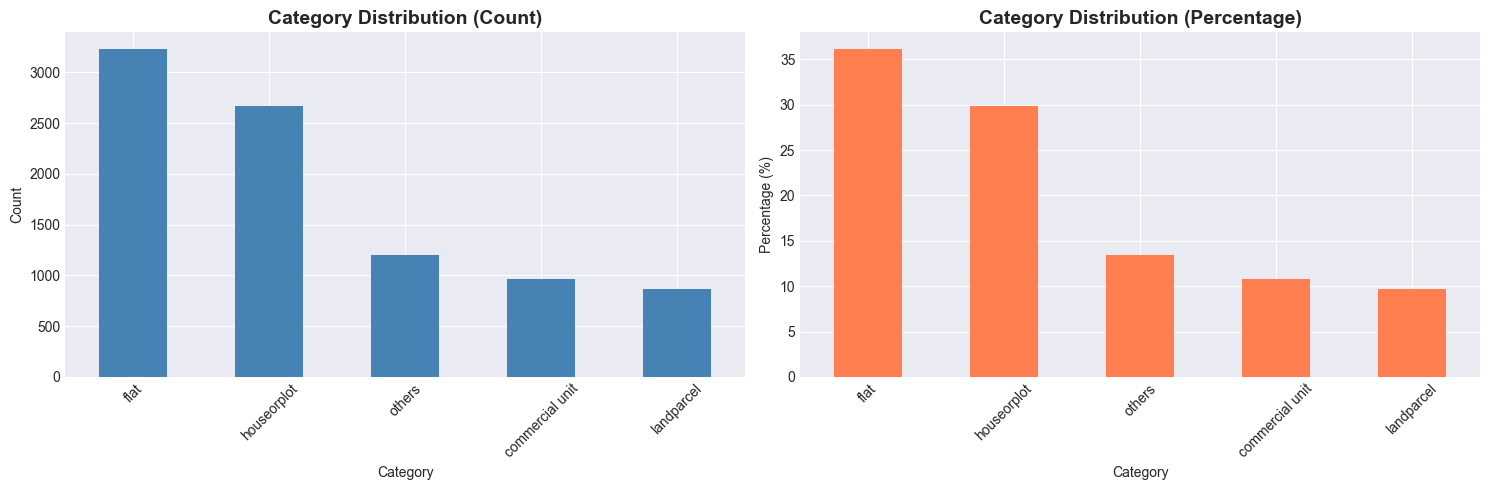


✅ Plot saved to results/category_distribution.png


In [5]:
# Cell 4: Category Distribution
print("=== CATEGORY DISTRIBUTION ===")
category_counts = train_df['categories'].value_counts()
print(category_counts)
print(f"\nPercentage distribution:")
print((category_counts / len(train_df) * 100).round(2))

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
category_counts.plot(kind='bar', ax=ax[0], color='steelblue')
ax[0].set_title('Category Distribution (Count)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

# Percentage plot
(category_counts / len(train_df) * 100).plot(kind='bar', ax=ax[1], color='coral')
ax[1].set_title('Category Distribution (Percentage)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Percentage (%)')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../results/category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Plot saved to results/category_distribution.png")

In [6]:
# Cell 5: Sample Addresses per Category
print("=== SAMPLE ADDRESSES PER CATEGORY ===\n")
for category in sorted(train_df['categories'].unique()):
    print(f"--- {category.upper()} ---")
    samples = train_df[train_df['categories'] == category]['property_address'].head(5)
    for i, address in enumerate(samples, 1):
        print(f"{i}. {address}")
    print()

=== SAMPLE ADDRESSES PER CATEGORY ===

--- COMMERCIAL UNIT ---
1. Entire , Yes Bank, Urban Estate , Sco Plot No-652,Sector-644 Faridabad, Sco Plot No-971, Near Om Sweets , Na , Faridabad, Sector-39 Faridabad, Faridabad, Haryana, 121002
2. Unit Number 1014, 10 Floor, Solaris Business Hub, Solaris Business Hub, Opp. National School Nrpashwanath Jain Templa Sola Road Bhuyangdev Ahmedabad F.P No 463, R.S No 218, T.P S Noo 29 ( Naranpura), Moje Wadaj, Ta-Dist Ahmedabad,
3. Shop No 944 Gopalpura By Pass Jaipur-302020 New Atish Market Near Ganga Jamuna Petrol Pump
4. Navagadh Rs No 79 Paiki 1, Plot No 77 To 100, Shop No A/6, Ground Floor, Porbandar Rajkot Highway, Tal : Jetpur, Dist : Rajkot 360370 Wing A, Green City, Yasodanagar A, Nr Tatkal Hanuman Temple Chowk, Nr Tatkal Hanuman Temple
5. Commercia Bearing Old R.S.No.1054 Paikki At Madhapar, Bhuj Kachchh Ground Floor Shop No.4 On Sub Plot No.28-29-30/A Having Village Panchayat Property No.5/4/195 To 197/A Sarasvati Vidyalay

--- FLAT ---
1

In [7]:
# Cell 6: Text Statistics
train_df['text_length'] = train_df['property_address'].str.len()
train_df['word_count'] = train_df['property_address'].str.split().str.len()
train_df['num_digits'] = train_df['property_address'].str.count(r'\d')

print("=== TEXT STATISTICS ===")
print(train_df[['text_length', 'word_count', 'num_digits']].describe())

# Statistics by category
print("\n=== AVERAGE TEXT LENGTH BY CATEGORY ===")
print(train_df.groupby('categories')['text_length'].mean().sort_values(ascending=False))

=== TEXT STATISTICS ===
       text_length   word_count   num_digits
count  8936.000000  8936.000000  8936.000000
mean    145.790063    20.987243    16.256938
std      85.951123    14.295407    12.462735
min       4.000000     1.000000     0.000000
25%      95.000000    13.000000     9.000000
50%     128.000000    17.000000    13.000000
75%     166.000000    24.000000    20.000000
max    1004.000000   168.000000   173.000000

=== AVERAGE TEXT LENGTH BY CATEGORY ===
categories
flat               163.506807
commercial unit    159.466321
houseorplot        146.046390
landparcel         117.119678
others             107.169591
Name: text_length, dtype: float64


In [8]:
# Cell 7: Keyword Analysis
import re

def extract_keywords(text):
    """Extract common property-related keywords"""
    text = text.lower()
    keywords = {
        'flat': bool(re.search(r'\bflat\b|\bapartment\b|\bapt\b', text)),
        'house': bool(re.search(r'\bhouse\b|\bvilla\b|\bbungalow\b', text)),
        'plot': bool(re.search(r'\bplot\b|\bsite\b', text)),
        'land': bool(re.search(r'\bland\b|\bacre\b|\bhectare\b', text)),
        'commercial': bool(re.search(r'\bshop\b|\boffice\b|\bcommercial\b|\bshowroom\b', text)),
        'floor': bool(re.search(r'\bfloor\b|\bstorey\b', text)),
        'area': bool(re.search(r'\bsq\b|\bsqft\b|\bsquare\b', text))
    }
    return keywords

# Apply to sample
sample_keywords = train_df['property_address'].head(100).apply(extract_keywords)
keyword_df = pd.DataFrame(sample_keywords.tolist())

print("=== KEYWORD FREQUENCY (Sample of 100) ===")
print(keyword_df.sum().sort_values(ascending=False))

=== KEYWORD FREQUENCY (Sample of 100) ===
plot          40
flat          27
floor         26
house         14
area           5
land           3
commercial     3
dtype: int64


In [9]:
# Cell 8: Save Processed Data (if needed)
# Drop temporary columns
train_df_clean = train_df.drop(['text_length', 'word_count', 'num_digits'], axis=1)

# Save
train_df_clean.to_csv('../data/processed/train_clean.csv', index=False)
val_df.to_csv('../data/processed/validation_clean.csv', index=False)

print("✅ EDA Complete! Data saved to processed folder.")

✅ EDA Complete! Data saved to processed folder.
